### Load Data

In [9]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/'

# Load files into a pandas dataframes
file = path + 'Dataset.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date")

### Split Data

In [10]:
test_size = 0.2         # Train/Test split
dep_var = 'TIV'         # Dependant variable (TIV or Orders)

# Select input and target variables
X = df.drop(dep_var, axis=1)
y = df[dep_var]

# Split data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=False)

# Print shape
X_train.shape, X_test.shape 

# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform (X_test)

In [11]:
import plotly.graph_objs as go
title = dep_var + ' 2011–2022 - Train/Test Split'
fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=X_train.index, y=y_train, mode='lines+markers', name= 'Train')))
fig.add_trace(go.Scatter(dict(x=X_test.index, y=y_test, mode='lines+markers', name= 'Test')))
fig.update_layout(title=go.layout.Title(
 text=title,
 xref='paper',x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
 family='Courier New, monospace',
 size=6,
 color='#7f7f7f'))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Retails',font=dict(
 family='Courier New, monospace',
 size=18,
 color='#7f7f7f'))))
fig.show()

### Scoring function

In [12]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the modules
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objs as go

metrics = pd.DataFrame()

def scoring(model_name, model, X_train_set, y_train_set, features, labels):

    # Fit the regressor to the training data
    model.fit(X_train_set, y_train_set)    
    
    # Make predictions
    predictions = model.predict(features)
    
    # Calculate metrics
    mae = mean_absolute_error(labels, predictions)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(labels, predictions)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                               # RMSE (Root Mean Squared Error)
    r2 = r2_score(labels, predictions)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((labels - predictions) / labels)) * 100       # MAPE
    accuracy = 100 - mape                                               # Accuracy

    # Append metrics for summary
    metrics[model_name] = [mae, mse, rmse, r2, mape, accuracy]
    metrics.index = ['Mean Absolute Error', 
                    'Mean Squared Error', 
                    'Root Mean Squared Error',
                    'R^2',
                    'Mean Absolute Percentage Error',
                    'Accuracy']
    
    # Print metrics  
    print(model_name, 'Model Performance:')                             # Model name
    print('Mean Absolute Error: {:0.2f}.'.format(mae))                  # MAE
    print('Mean Squared Error: {:0.2f}.'.format(mse))                   # MSE
    print('Root Mean Squared Error: {:0.2f}.'.format(rmse))             # RMSE  
    print('R^2 Score = {:0.2f}.'.format(r2))                            # R2
    print('Mean Absolute Percentage Error: {:0.2f}%.'.format(mape))     # MAPE 
    print('Accuracy = {:0.2f}%.'.format(accuracy))                      # Accuracy

    df = pd.DataFrame(labels)
        
    # Plot Actual values vs predicted values
    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=df.index, y=labels, mode='lines+markers', name= 'Actual')))
    fig.add_trace(go.Scatter(dict(x=df.index, y=predictions, mode='lines+markers', name= 'Predicted')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions with ' + model_name,
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars',font=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'))))
    fig.show()   

### XGBoost (Extreme Gradient Boosting)

#### Baseline

In [18]:
import xgboost as xgb

# Import XGBRegressor
from xgboost import XGBRegressor         
          
# Instantiate the regressor
model = XGBRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

XGBRegressor Model Performance:
Mean Absolute Error: 2339.65.
Mean Squared Error: 7588957.63.
Root Mean Squared Error: 2754.81.
R^2 Score = -2.81.
Mean Absolute Percentage Error: 27.81%.
Accuracy = 72.19%.


In [14]:
# Compute and print model score with scaled data
model_name = model.__class__.__name__ + ' Scaled'
scoring(model_name, model, X_train_norm, y_train, X_test_norm, y_test)

XGBRegressor Scaled Model Performance:
Mean Absolute Error: 2339.65.
Mean Squared Error: 7588957.63.
Root Mean Squared Error: 2754.81.
R^2 Score = -2.81.
Mean Absolute Percentage Error: 27.81%.
Accuracy = 72.19%.


https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7


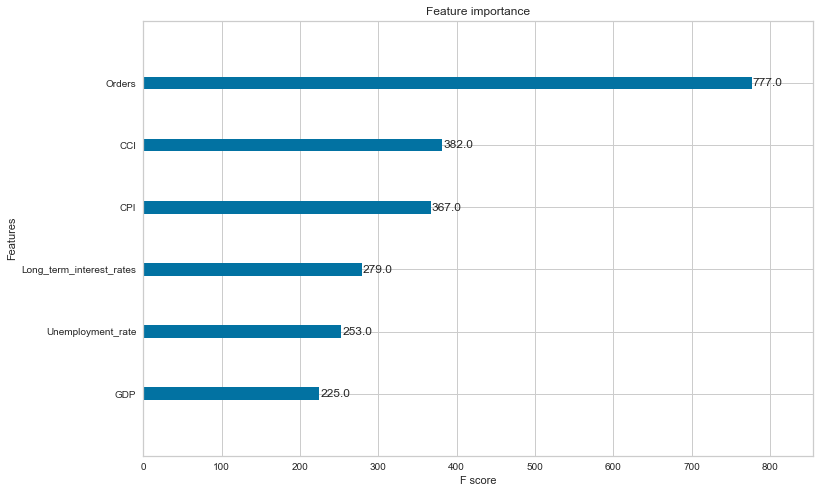

In [44]:
from xgboost import plot_importance
#importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
fig, ax = plt.subplots(figsize=(12,8))
plot_importance(model, ax=ax, importance_type='weight') 
plt.show();

In [43]:
model.get_booster().get_score(importance_type='total_gain')

{'Orders': 447427008.0,
 'GDP': 23295216.0,
 'CCI': 105594712.0,
 'CPI': 84928192.0,
 'Unemployment_rate': 55105344.0,
 'Long_term_interest_rates': 103052976.0}

#### Feature Selection

In [17]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    # Fit the regressor to the training data
    selection_model = XGBRegressor(random_state=42)
    selection_model.fit(select_X_train, y_train)    
    
    # Make predictions
    y_pred = selection_model.predict(select_X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(y_test, y_pred)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                          # RMSE (Root Mean Squared Error)
    r2 = r2_score(y_test, y_pred)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100       # MAPE
    accuracy = 100 - mape                                          # Accuracy
    
    # Print metrics
    print("Thresh=%.3f, n=%d, MAE=%.3f, MSE=%.3f, RMSE==%.3f, R2==%.3f, MAPE==%.3f, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], mae, mse, rmse, r2, mape, accuracy))


Thresh=0.043, n=7, MAE=2339.650, MSE=7588957.635, RMSE==2754.806, R2==-2.806, MAPE==27.813, Accuracy: 72.19%
Thresh=0.075, n=6, MAE=2359.413, MSE=8090146.175, RMSE==2844.318, R2==-3.057, MAPE==28.438, Accuracy: 71.56%
Thresh=0.093, n=5, MAE=1989.553, MSE=5625040.486, RMSE==2371.717, R2==-1.821, MAPE==23.723, Accuracy: 76.28%
Thresh=0.112, n=4, MAE=1900.071, MSE=4896055.058, RMSE==2212.703, R2==-1.455, MAPE==22.765, Accuracy: 77.24%
Thresh=0.133, n=3, MAE=2002.363, MSE=5387973.379, RMSE==2321.201, R2==-1.702, MAPE==24.139, Accuracy: 75.86%
Thresh=0.195, n=2, MAE=2361.899, MSE=7499622.474, RMSE==2738.544, R2==-2.761, MAPE==27.815, Accuracy: 72.18%
Thresh=0.348, n=1, MAE=1548.697, MSE=3018790.770, RMSE==1737.467, R2==-0.514, MAPE==18.126, Accuracy: 81.87%


In [64]:
features = [
#    'Orders', 
#    'GDP', 
#    'CCI', 
#    'CPI', 
#    'Unemployment_rate',
    'Long_term_interest_rates', 
    'Avg_Fuel_Price'
    ]

X_train_fs = X_train.drop(features, axis=1)
X_test_fs = X_test.drop(features, axis=1)

In [65]:
# Compute and print model score with scaled data
model_name = model.__class__.__name__ + ' with Feature Selection'
scoring(model_name, model, X_train_fs, y_train, X_test_fs, y_test)

XGBRegressor with Feature Selection Model Performance:
Mean Absolute Error: 1285.26.
Mean Squared Error: 2381200.07.
Root Mean Squared Error: 1543.11.
R^2 Score = -0.19.
Mean Absolute Percentage Error: 14.88%.
Accuracy = 85.12%.


#### Hyperparameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
xgb_n_estimators = [100, 500, 1000]
xgb_max_depth = [4, 6, 8]
xgb_min_child_weight = [1, 3, 5]
xgb_eta = [0.01, 0.1, 0.2, 0.3]
#xgb_subsample = [0.9, 0.5, 0.2, 0.1]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
param_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'eta': xgb_eta,
#            'subsample': xgb_subsample,
            'objective': xgb_objective}

# Tune the Model
model_base = XGBRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

 The best score across ALL searched params:
 -0.12831012106221254

 The best parameters across ALL searched params:
 {'eta': 0.01, 'max_depth': 4, 'min_child_

#### Tuned Model

In [67]:
# Create the fnal Extreme Gradient Booster
model_tuned = XGBRegressor(objective = 'reg:squarederror',
                         n_estimators = 500,
                         min_child_weight = 1,
                         max_depth = 6,                                                  
                         eta = 0.3,
                         random_state = 42)

# Fit the regressor to the training data
model_tuned.fit(X_train, y_train)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

XGBRegressor Tuned Model Performance:
Mean Absolute Error: 2339.85.
Mean Squared Error: 7590067.20.
Root Mean Squared Error: 2755.01.
R^2 Score = -2.81.
Mean Absolute Percentage Error: 27.82%.
Accuracy = 72.18%.


### LGBM (Light Gradient Boosting Model)

#### Baseline

In [68]:
import lightgbm as lgbm

# Import LightGBM Regressor
from lightgbm import LGBMRegressor
          
# Instantiate the regressor
model = LGBMRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

LGBMRegressor Model Performance:
Mean Absolute Error: 975.46.
Mean Squared Error: 1496061.87.
Root Mean Squared Error: 1223.14.
R^2 Score = 0.25.
Mean Absolute Percentage Error: 12.06%.
Accuracy = 87.94%.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

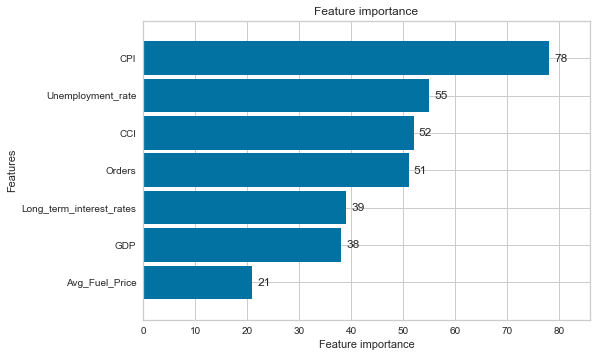

In [69]:
lgbm.plot_importance(model, max_num_features = 60, height=.9)

#### Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning
lgbm_n_estimators = [100, 500, 1000]
lgbm_max_depth = [4, 6, 8]
lgbm_num_leaves = [3, 5, 7]
lgbm_learning_rate = [0.01, 0.1, 0.2, 0.3]
lgbm_subsample = [0.9, 0.5, 0.2, 0.1]

# Create the grid
param_grid = {'n_estimators': lgbm_n_estimators,
            'max_depth': lgbm_max_depth,
            'num_leaves': lgbm_num_leaves,
            'learning_rate': lgbm_learning_rate,
            'subsample': lgbm_learning_rate
           }

# Tune the Model
model_base = LGBMRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(learning_rate=0.01, max_depth=4, num_leaves=5, random_state=42,
              subsample=0.01)

 The best score across ALL searched params:
 -0.12165584045908702

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 5, 'subsample': 0.01}


#### Tuned Model

In [70]:
# Create the fnal LightGBM Model
model_tuned = LGBMRegressor(n_estimators = 100,
                         num_leaves= 5,
                         max_depth = 4,                         
                         subsample = 0.01,
                         learning_rate= 0.01,
                         random_state = 42)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

LGBMRegressor Tuned Model Performance:
Mean Absolute Error: 1597.16.
Mean Squared Error: 3437007.10.
Root Mean Squared Error: 1853.92.
R^2 Score = -0.72.
Mean Absolute Percentage Error: 20.35%.
Accuracy = 79.65%.


### Random Forest

#### Baseline

In [71]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
          
# Instantiate the regressor
model = RandomForestRegressor(random_state=42)

# Compute and print model score
scoring(model.__class__.__name__, model, X_train, y_train, X_test, y_test)

RandomForestRegressor Model Performance:
Mean Absolute Error: 1003.47.
Mean Squared Error: 1478733.10.
Root Mean Squared Error: 1216.03.
R^2 Score = 0.26.
Mean Absolute Percentage Error: 11.88%.
Accuracy = 88.12%.


#### Hyperparameter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Set hyperparameters possibilities for model tuning 
rf_n_estimators = [100, 500, 1000]
rf_max_depth = [4, 6, 8, 10]
rf_max_features = ['auto', 'sqrt']
rf_min_samples_leaf = [1, 2, 4]
rf_min_samples_split = [2, 5, 10]
rf_bootstrap = [True, False]

# Create the grid
param_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'max_features': rf_max_features,
           'min_samples_leaf': rf_min_samples_leaf,
           'min_samples_split': rf_min_samples_split,
           'bootstrap': rf_bootstrap
        }

# Tune the Model
model_base = RandomForestRegressor(random_state=42)

model_grid = GridSearchCV(estimator = model_base, param_grid = param_grid, cv = 5, verbose = 1)

model_grid.fit(X_train, y_train)

model_grid.best_params_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


Tuned Model

In [72]:
# Create the fnal Random Forest Regressor Model
model_tuned = RandomForestRegressor(n_estimators = 1000,
                         max_depth = 8,                         
                         max_features = 'sqrt',
                         min_samples_leaf= 4,
                         min_samples_split = 10,
                         bootstrap = True,
                         random_state = 42)

# Compute and print model score
model_name = model_tuned.__class__.__name__ + ' Tuned'
scoring(model_name, model_tuned, X_train, y_train, X_test, y_test)

RandomForestRegressor Tuned Model Performance:
Mean Absolute Error: 1228.54.
Mean Squared Error: 2258127.71.
Root Mean Squared Error: 1502.71.
R^2 Score = -0.13.
Mean Absolute Percentage Error: 15.65%.
Accuracy = 84.35%.


### Summary

In [73]:
pd.options.display.float_format = "{:,.2f}".format
metrics

,XGBRegressor,XGBRegressor Scaled,XGBRegressor with Feature Selection,XGBRegressor Tuned,LGBMRegressor,LGBMRegressor Tuned,RandomForestRegressor,RandomForestRegressor Tuned
Mean Absolute Error,"2,339.65","2,339.65","1,285.26","2,339.85",975.46,"1,597.16","1,003.47","1,228.54"
Mean Squared Error,"7,588,957.63","7,588,957.63","2,381,200.07","7,590,067.20","1,496,061.87","3,437,007.10","1,478,733.10","2,258,127.71"
Root Mean Squared Error,"2,754.81","2,754.81","1,543.11","2,755.01","1,223.14","1,853.92","1,216.03","1,502.71"
R^2,-2.81,-2.81,-0.19,-2.81,0.25,-0.72,0.26,-0.13
Mean Absolute Percentage Error,27.81,27.81,14.88,27.82,12.06,20.35,11.88,15.65
Accuracy,72.19,72.19,85.12,72.18,87.94,79.65,88.12,84.35


### Feature engineering ?

In [ ]:
df['Year'] = df.index.astype(str).str[:4]
df['Month'] = df.index.astype(str).str[5:7]